In [1]:
import sklearn
import pandas as pd
import random
from copy import copy

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/ionosphere/ionosphere.data'

In [3]:
ionos = pd.read_csv(url, header=None)

In [52]:
the_big_order[0] == the_big_order[1] 

False

In [63]:
# the_order = [n for n in range(0,351)]
# the_big_order = []

# for i in range(0,1000):
#     random.seed(i)
#     random.shuffle(the_order)
#     the_big_order.append(copy(the_order))

# with open('the_big_order.json', 'w') as f:
#     json.dump(the_big_order)

with open('the_big_order.json') as f:
    the_big_order = json.load(f)

In [7]:
feature_columns = [x+1 for x in range(0,33)]
target_columns = 34
ionos[feature_columns].head()

,1,2,3,4,5,6,7,8,9,10,...,24,25,26,27,28,29,30,31,32,33
0,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [34]:
le = LabelEncoder()
le.fit(ionos.iloc[:,target_columns])

LabelEncoder()

In [105]:
summ = []
for seed, the_order in enumerate(the_big_order):
    try:
        count = 0
        for i in range(10, len(the_order)-1-70):
            count += 1
            row_train = the_order[0:i]
            len_row_test = (len(row_train) // 4)
            if len_row_test == 0:
                len_row_test += 1
            row_test = the_order[281:]
            lr = LogisticRegression(random_state=0, solver='lbfgs')
            nb = GaussianNB()
            knn = KNeighborsClassifier(n_neighbors=5)    

            lr.fit(ionos.iloc[row_train, feature_columns], ionos.iloc[row_train, target_columns])
            nb.fit(ionos.iloc[row_train, feature_columns], ionos.iloc[row_train, target_columns])
            knn.fit(ionos.iloc[row_train, feature_columns], ionos.iloc[row_train, target_columns])
            lr_prediction = le.transform(lr.predict(ionos.iloc[row_test, feature_columns]))
            nb_prediction = le.transform(nb.predict(ionos.iloc[row_test, feature_columns]))
            knn_prediction = le.transform(knn.predict(ionos.iloc[row_test, feature_columns]))
            label = le.transform(ionos.iloc[row_test, target_columns])

            accuracy = {
                        'f1_nb': f1_score(label, nb_prediction),
                        'f1_lr': f1_score(label, lr_prediction),
                        'f1_knn': f1_score(label, knn_prediction),
                        'acc_nb': accuracy_score(label, nb_prediction),
                        'acc_lr': accuracy_score(label, lr_prediction),
                        'acc_knn': accuracy_score(label, knn_prediction), 
                        'len_train': len(row_train),
                        'len_test': len(row_test), 
                        'seed': seed
                       }
            summ.append(accuracy)
            if count == 150:
                break
        if seed == 500:
            break
    except Exception as e:
        if e == KeyboardInterrupt:
            raise e
        else:
            pass # do nothing

c:\users\ramos\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [96]:
summ_df = pd.DataFrame(summ)

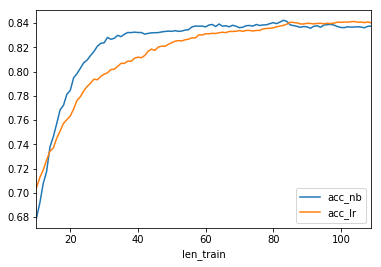

In [103]:
summ_df.groupby('len_train').mean().plot(y=['acc_nb', 'acc_lr'])